In [213]:
# 自作モジュールへの変更を自動的にリロードするためのおまじない
%load_ext autoreload
%autoreload 2


import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import lib.S2Z as stoz
import lib.Z_model as zmodel
import lib.Useful as usf

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


logをとってしまった状態でフィッティングしたほうが良いと寺山さんがおっしゃっていました

[ 4.10166572e-06  1.69123521e-10 -5.75490681e+00  3.58640433e-11
  4.95071809e+00]
[1.24546532e-09 5.19552704e-14 2.95233335e-02 1.09496495e-14
 1.71043523e-02]


/var/folders/ym/78fvb0xd4cs9ngj5d0z63cfr0000gn/T/ipykernel_43444/2715357254.py:11: RuntimeWarning: invalid value encountered in sqrt
  print(np.diag(np.sqrt(pcov)))


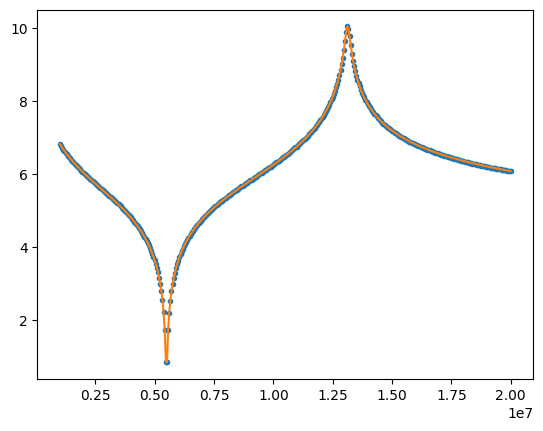

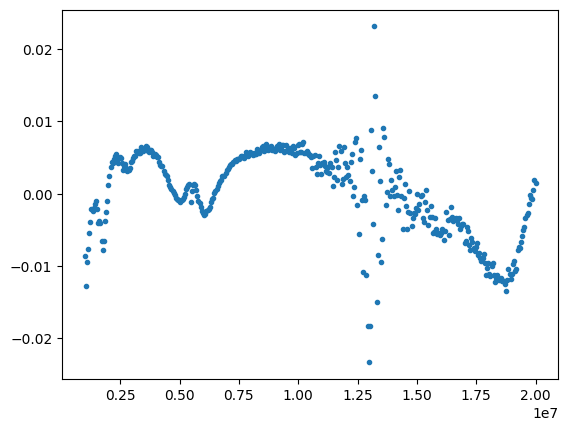

In [214]:
data = np.loadtxt("../data/coil+dee(serial)_1-20MHz_2026_02_04.s1p",delimiter=' ')
freq,Z_tot = stoz.direct(data)

Z_abs_log = np.log(np.abs(Z_tot))

popt,pcov = curve_fit(zmodel.RLC_ser_stray_abs_log,freq,Z_abs_log,p0=(6e-6,30e-12,10,30e-12,10))
plt.plot(freq,Z_abs_log,'.',label='data')
plt.plot(freq,zmodel.RLC_ser_stray_abs_log(freq,*popt),label='fit')
plt.figure()
print(popt)
print(np.diag(np.sqrt(pcov)))

plt.plot(freq, Z_abs_log - zmodel.RLC_ser_stray_abs_log(freq,*popt), '.', label = 'zansa')

この計算についてはノートを参照してください。

Text(0.5, 1.0, 'Abs of Sum of Impedance (Z_L + Z_c), semilog')

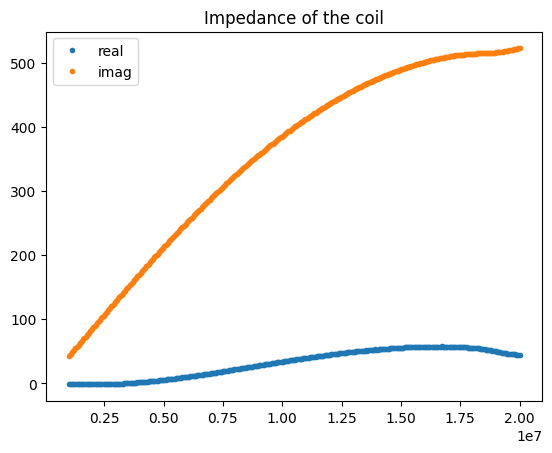

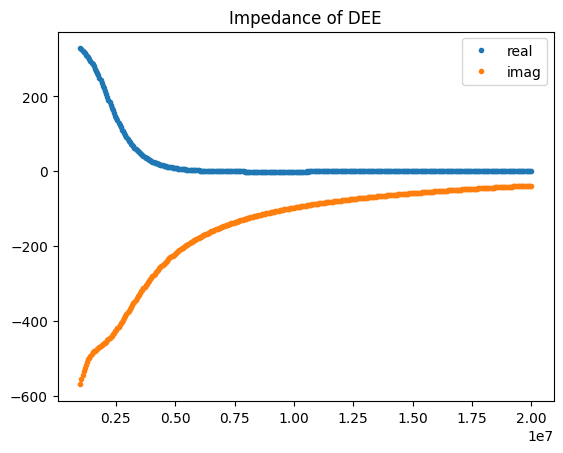

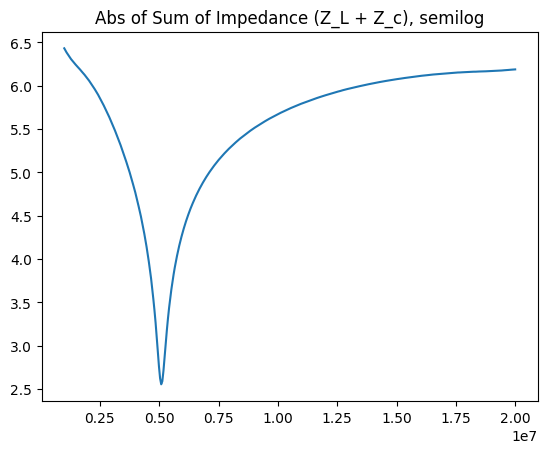

In [215]:
data = np.loadtxt("../data/coil+dee(serial)_dee_to_port1.s2p",delimiter=' ')
freq,Z_L,Z_C = stoz.bridge_at_port1(data)

plt.plot(freq,Z_L.real,'.',label='real')
plt.plot(freq,Z_L.imag,'.',label='imag')
plt.legend()
plt.title('Impedance of the coil')
plt.figure()
plt.plot(freq,Z_C.real,'.',label='real')
plt.plot(freq,Z_C.imag,'.',label='imag')
plt.title('Impedance of DEE')
plt.legend()
plt.figure()

Z_tot_port1 = Z_L + Z_C
plt.plot(freq, np.log(np.abs(Z_tot_port1)))
plt.title('Abs of Sum of Impedance (Z_L + Z_c), semilog')

入力電圧に対するDEEの電圧の比は以下のようにかけるはず

freq peak 1 =  5.5125 MHz
freq peak 2 =  5.085 MHz


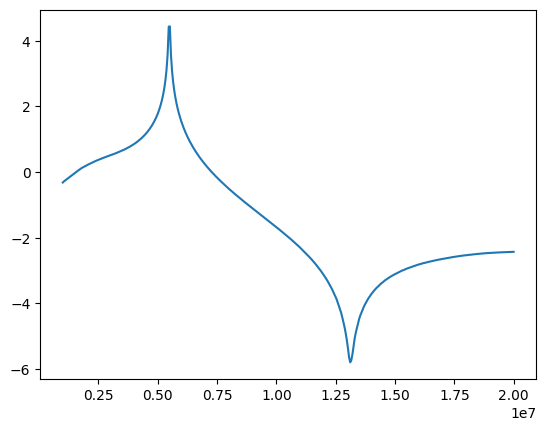

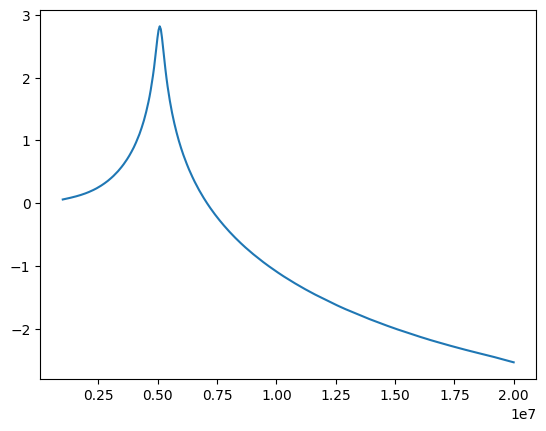

In [216]:
freq_peak_1 = freq[np.argmax(np.abs(Z_C)/np.abs(Z_tot))]
freq_peak_2 = freq[np.argmax(np.abs(Z_C)/np.abs(Z_tot_port1))]
print("freq peak 1 = ", freq_peak_1 * 10 ** (-6), "MHz")
print("freq peak 2 = ", freq_peak_2 * 10 ** (-6), "MHz")



plt.plot(freq,np.log(np.abs(Z_C)/np.abs(Z_tot)))
plt.figure()
#Ztotのほうをport1のデータを使って表示すると以下のようになる
plt.plot(freq,np.log(np.abs(Z_C)/np.abs(Z_tot_port1)))




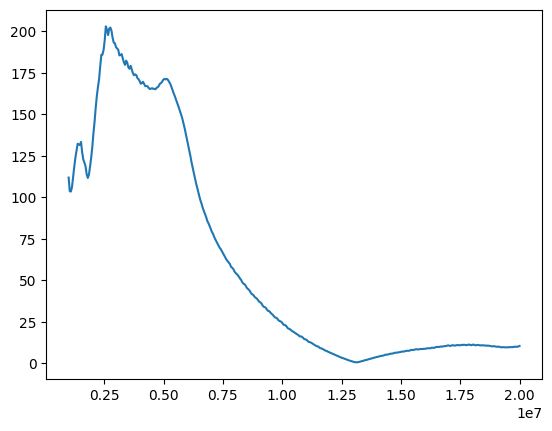

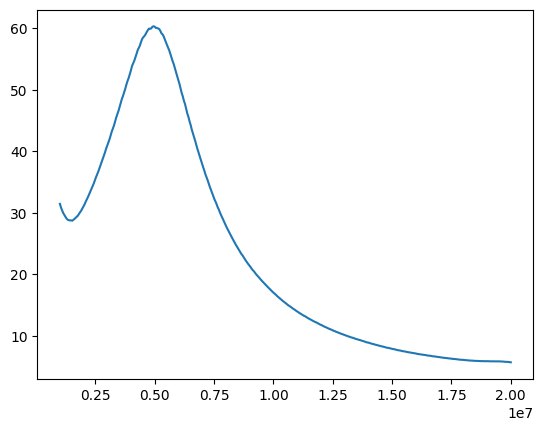

In [217]:
plt.plot(freq,np.abs(Z_C.imag)/np.sqrt(Z_tot.real))
plt.figure()
plt.plot(freq,np.abs(Z_C.imag)/np.sqrt(Z_tot_port1.real))


port2でも同じことをやる

Text(0.5, 1.0, 'Abs of Sum of Impedance (Z_L + Z_c), semilog')

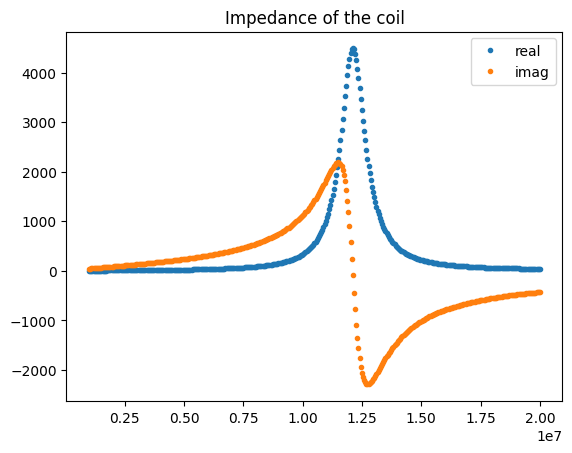

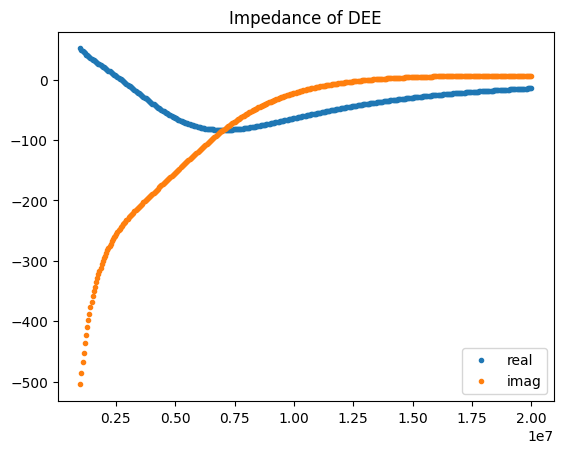

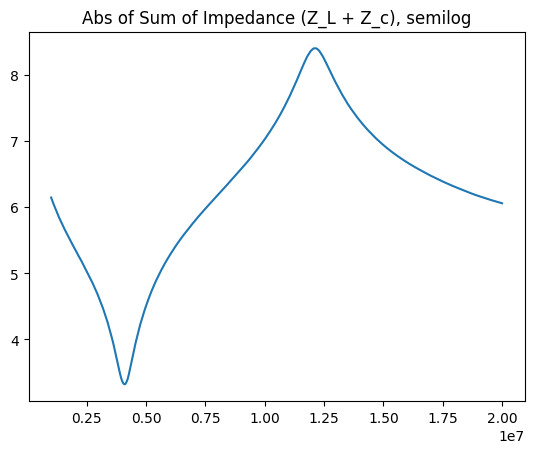

In [218]:
data = np.loadtxt("../data/coil+dee(serial)_dee_to_port2.s2p",delimiter=' ')
freq,Z_L,Z_C = stoz.bridge_at_port2(data)

plt.plot(freq,Z_L.real,'.',label='real')
plt.plot(freq,Z_L.imag,'.',label='imag')
plt.legend()
plt.title('Impedance of the coil')
plt.figure()
plt.plot(freq,Z_C.real,'.',label='real')
plt.plot(freq,Z_C.imag,'.',label='imag')
plt.title('Impedance of DEE')
plt.legend()
plt.figure()

Z_tot_port2 = Z_L + Z_C
plt.plot(freq, np.log(np.abs(Z_tot_port2)))
plt.title('Abs of Sum of Impedance (Z_L + Z_c), semilog')

入力電圧に対するDeeの電圧

freq peak 2 =  4.0874999999999995 MHz


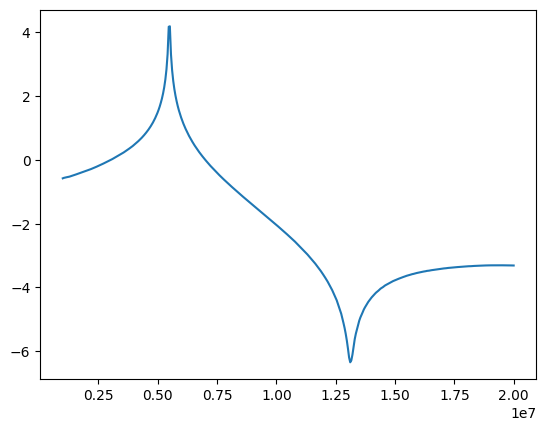

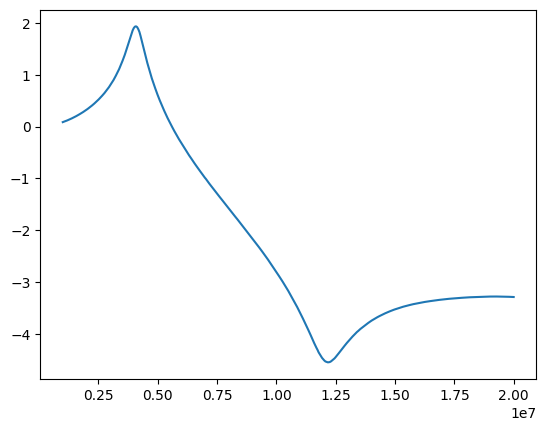

In [219]:
freq_peak_2 = freq[np.argmax(np.abs(Z_C)/np.abs(Z_tot_port2))]
print("freq peak 2 = ", freq_peak_2 * 10 ** (-6), "MHz")



plt.plot(freq,np.log(np.abs(Z_C)/np.abs(Z_tot)))
plt.figure()
#Ztotのほうをport2のデータを使って表示すると以下のようになる
plt.plot(freq,np.log(np.abs(Z_C)/np.abs(Z_tot_port2)))

入力電力に対する入力電圧

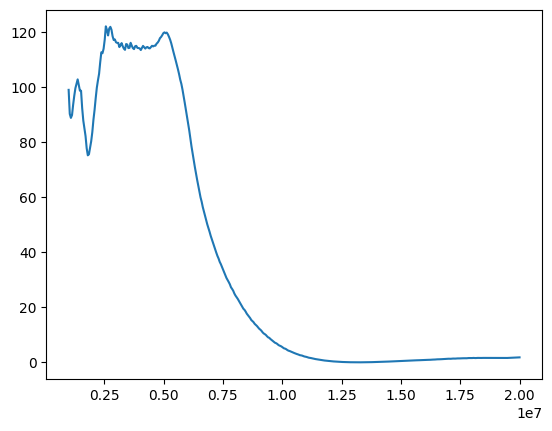

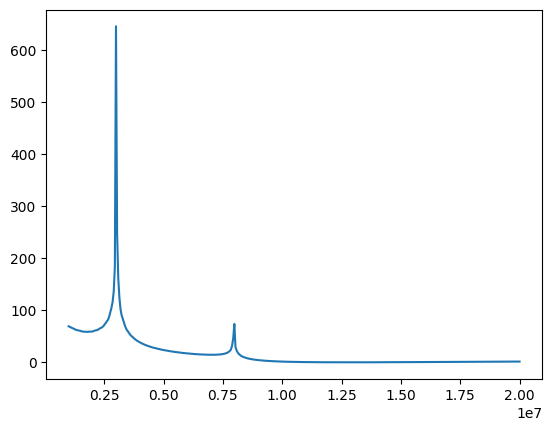

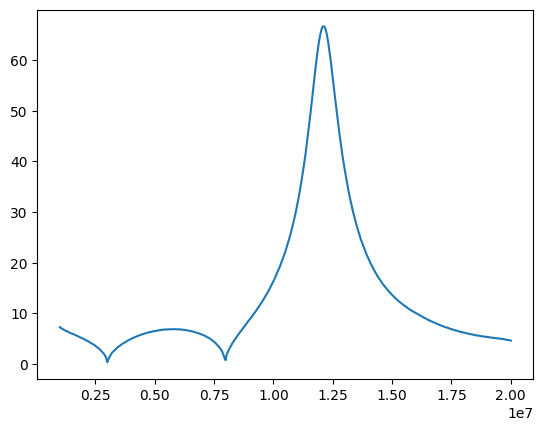

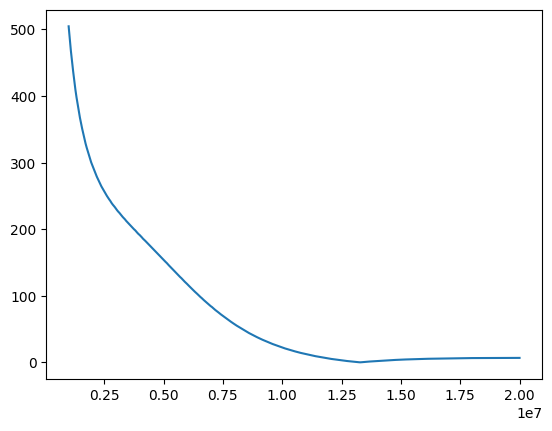

In [220]:
plt.plot(freq,np.abs(Z_C.imag)/np.sqrt(np.abs(Z_tot.real)))
plt.figure()
plt.plot(freq,np.abs(Z_C.imag)/np.sqrt(np.abs(Z_tot_port2.real)))
plt.figure()
plt.plot(freq, np.sqrt(np.abs(Z_tot_port2.real)))
#途中で負になる, 実インピーダンスが変？
plt.figure()
plt.plot(freq, np.abs(Z_C.imag))


ポート1をdeeに、同軸ケーブルないver

Text(0.5, 1.0, 'Abs of Sum of Impedance (Z_L + Z_c), semilog')

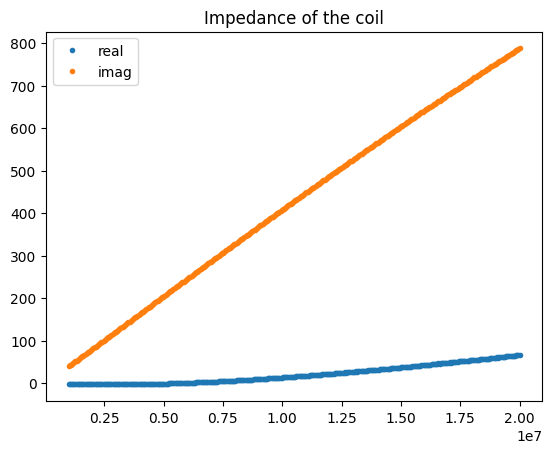

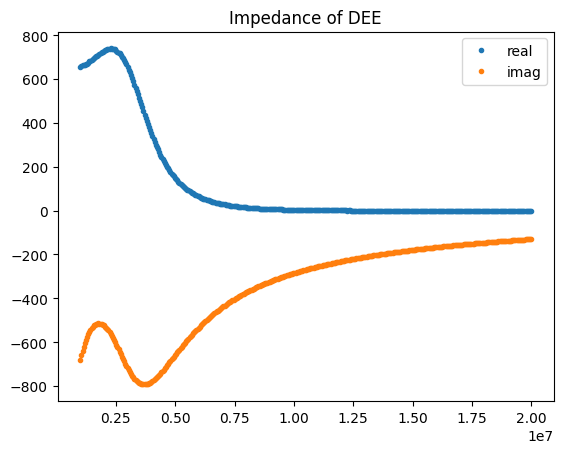

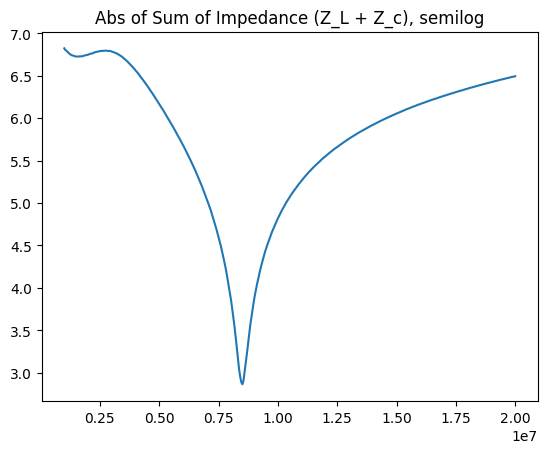

In [221]:
data = np.loadtxt("../data/coil+dee(serial)_1_20_02_13_dee_to_port1.s2p",delimiter=' ')
freq,Z_L,Z_C = stoz.bridge_at_port1(data)

plt.plot(freq,Z_L.real,'.',label='real')
plt.plot(freq,Z_L.imag,'.',label='imag')
plt.legend()
plt.title('Impedance of the coil')
plt.figure()
plt.plot(freq,Z_C.real,'.',label='real')
plt.plot(freq,Z_C.imag,'.',label='imag')
plt.title('Impedance of DEE')
plt.legend()
plt.figure()

Z_tot_port1 = Z_L + Z_C
plt.plot(freq, np.log(np.abs(Z_tot_port1)))
plt.title('Abs of Sum of Impedance (Z_L + Z_c), semilog')

ポート1をdeeに、同軸ケーブルないver 二回目？

Text(0.5, 1.0, 'Abs of Sum of Impedance (Z_L + Z_c), semilog')

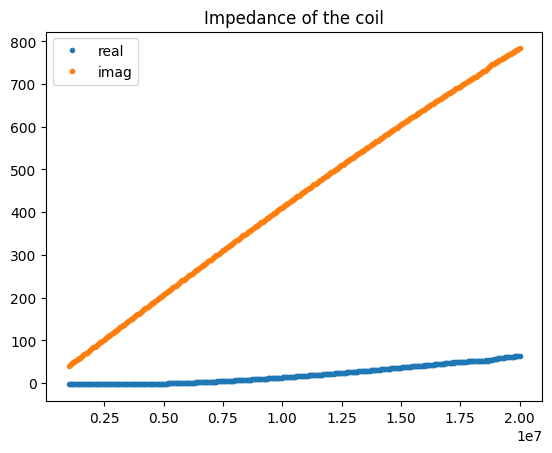

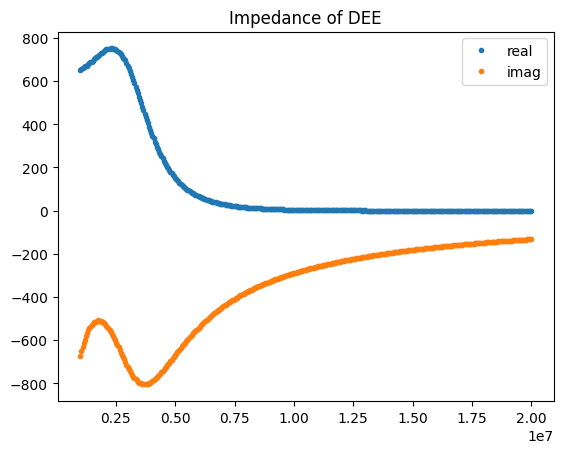

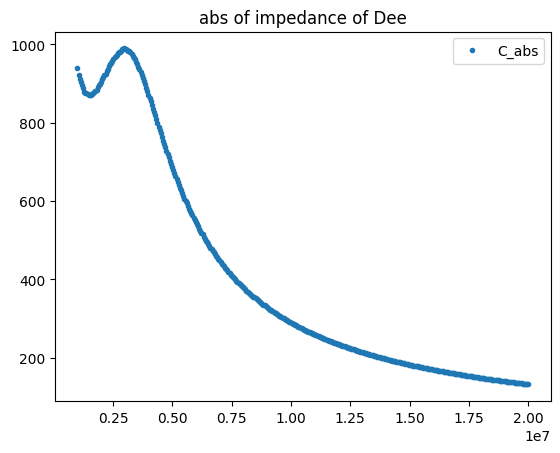

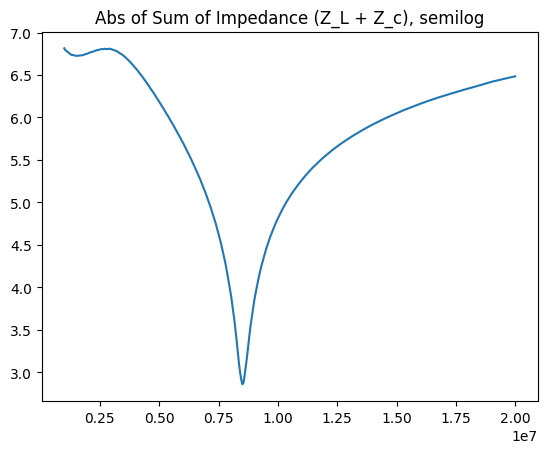

In [222]:
data = np.loadtxt("../data/coil+dee(serial)_1_20_02_13_dee_to_port1(2).s2p",delimiter=' ')
freq,Z_L,Z_C = stoz.bridge_at_port1(data)

plt.plot(freq,Z_L.real,'.',label='real')
plt.plot(freq,Z_L.imag,'.',label='imag')
plt.legend()
plt.title('Impedance of the coil')
plt.figure()
plt.plot(freq,Z_C.real,'.',label='real')
plt.plot(freq,Z_C.imag,'.',label='imag')
plt.title('Impedance of DEE')
plt.legend()
plt.figure()
plt.plot(freq,np.abs(Z_C), '.', label = 'C_abs')
plt.title('abs of impedance of Dee')
plt.legend()
plt.figure()

Z_tot_port1 = Z_L + Z_C
plt.plot(freq, np.log(np.abs(Z_tot_port1)))
plt.title('Abs of Sum of Impedance (Z_L + Z_c), semilog')

コイルのfit

6.2683273538248095e-06


Text(0.5, 1.0, 'Impedance of the coil')

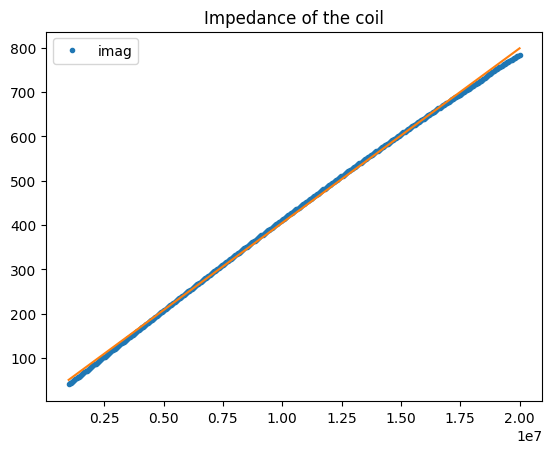

In [223]:
def linear(x,a,b):
    return a*x + b

popt,pcov = curve_fit(linear,freq,Z_L.imag)
print(popt[0]/(2 * np.pi))
plt.plot(freq,Z_L.imag,'.',label='imag')
plt.plot(freq,linear(freq,*popt))
plt.legend()
plt.title('Impedance of the coil')

deeのfit

4.5137642757044693e-11
-53.761070361979435


Text(0.5, 1.0, 'Impedance of the dee (imag)')

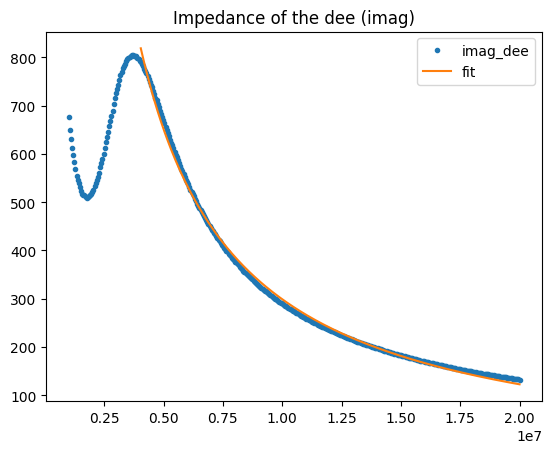

In [224]:
freq_min, freq_max = 0.4 * 10 ** 7, 2.00 * 10 ** 7
mask = (freq >= freq_min) & (freq <= freq_max)
freq_fit = freq[mask]
z_fit = -Z_C.imag[mask]


popt,pcov = curve_fit(zmodel.inverse_prop,freq_fit,z_fit)
print(1 / (2 * np.pi *popt[0]))
print(popt[1])

plt.plot(freq,-Z_C.imag,'.',label='imag_dee')
plt.plot(freq_fit,zmodel.inverse_prop(freq_fit,*popt), label = 'fit')
plt.legend()
plt.title('Impedance of the dee (imag)')

4.324561154709498e-11
-66.11177093873086


Text(0.5, 1.0, 'Impedance of the dee (abs)')

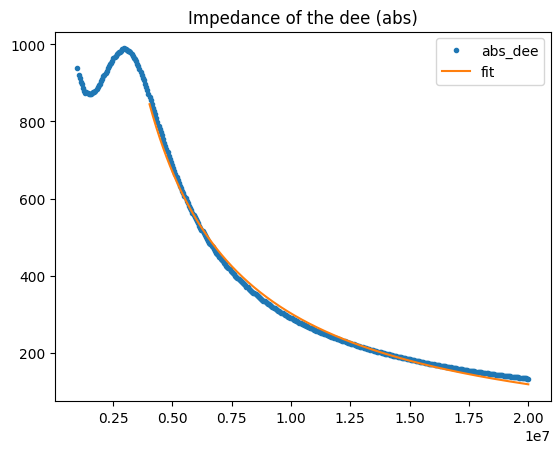

In [225]:
freq_min, freq_max = 0.4 * 10 ** 7, 2.00 * 10 ** 7
mask = (freq >= freq_min) & (freq <= freq_max)
freq_fit = freq[mask]
z_fit = np.abs(Z_C)[mask]

popt,pcov = curve_fit(zmodel.inverse_prop,freq_fit,z_fit)
print(1 / (2 * np.pi *popt[0]))
print(popt[1])

plt.plot(freq,np.abs(Z_C),'.',label='abs_dee')
plt.plot(freq_fit,zmodel.inverse_prop(freq_fit,*popt), label = 'fit')
plt.legend()
plt.title('Impedance of the dee (abs)')


入力電圧に対するdeeの電圧, 入力電力に対するdeeの電圧

<Figure size 640x480 with 0 Axes>

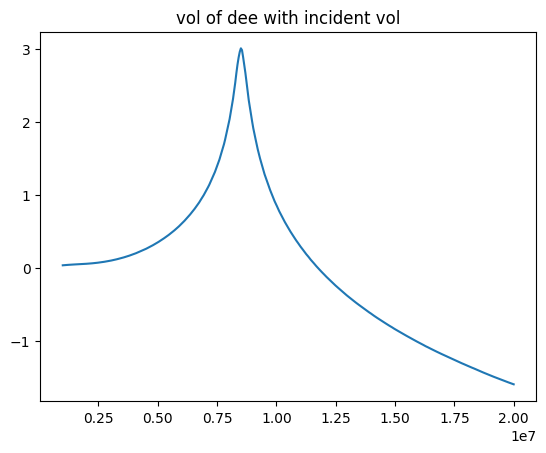

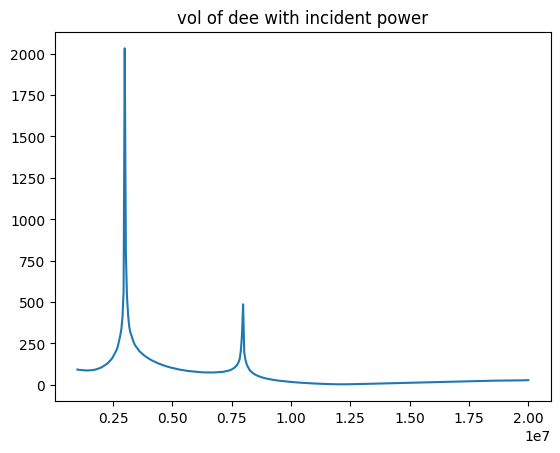

<Figure size 640x480 with 0 Axes>

In [226]:
plt.plot(freq,np.log(np.abs(Z_C)/np.abs(Z_tot_port1)))
plt.title('vol of dee with incident vol')
plt.figure()
plt.plot(freq,np.abs(Z_C.imag)/np.sqrt(np.abs(Z_tot_port2.real)))
plt.title('vol of dee with incident power')
plt.figure()

ポート2をdeeに、同軸ケーブルないver

Text(0.5, 1.0, 'Abs of Sum of Impedance (Z_L + Z_c), semilog')

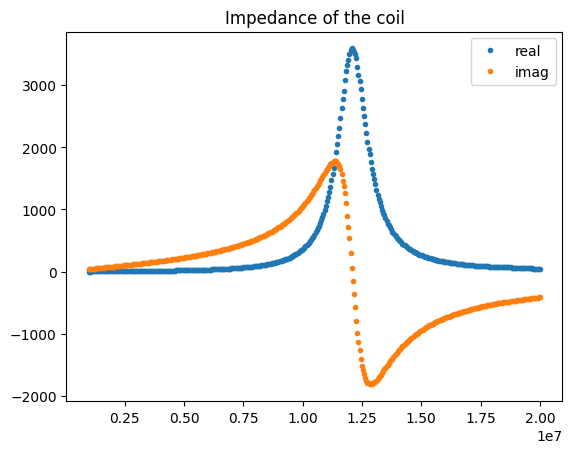

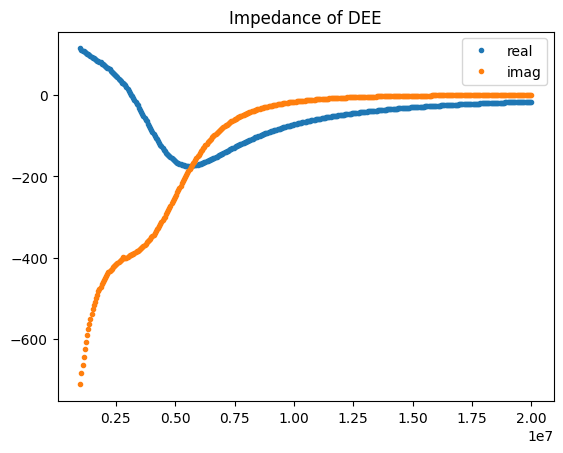

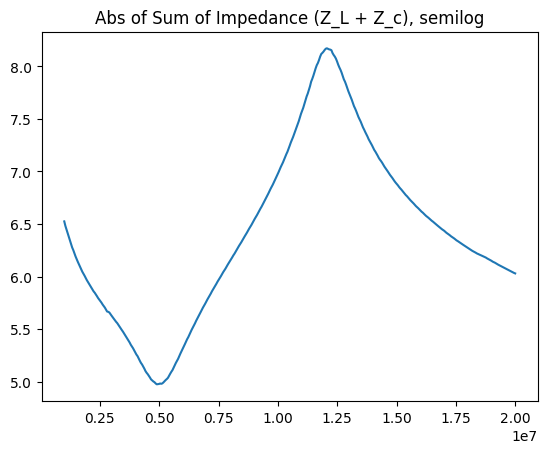

In [227]:
data = np.loadtxt("../data/coil+dee(serial)_dee_to_port2_1-20MHz_2026_02_13.s2p",delimiter=' ')
freq,Z_L,Z_C = stoz.bridge_at_port2(data)

plt.plot(freq,Z_L.real,'.',label='real')
plt.plot(freq,Z_L.imag,'.',label='imag')
plt.legend()
plt.title('Impedance of the coil')
plt.figure()
plt.plot(freq,Z_C.real,'.',label='real')
plt.plot(freq,Z_C.imag,'.',label='imag')
plt.title('Impedance of DEE')
plt.legend()
plt.figure()

Z_tot_port2 = Z_L + Z_C
plt.plot(freq, np.log(np.abs(Z_tot_port2)))
plt.title('Abs of Sum of Impedance (Z_L + Z_c), semilog')

[5.66099720e-06 3.01887980e-11 5.22615026e+01]


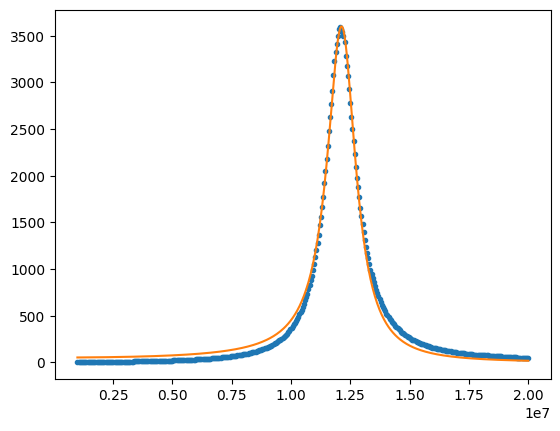

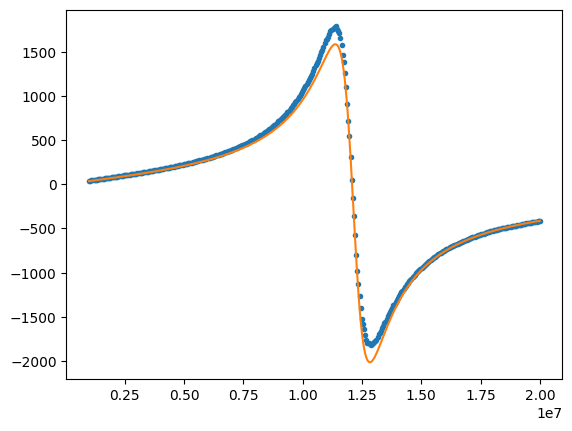

In [228]:
popt,pcov = curve_fit(zmodel.L_stray_real,freq,Z_L.real,p0=(6.16930586e-06,2.80023503e-11,8.83566071e+01))
plt.plot(freq,Z_L.real,'.')
plt.plot(freq,zmodel.L_stray_real(freq,*popt))
print(popt)

plt.figure()
popt,pcov = curve_fit(zmodel.L_stray_imag,freq,Z_L.imag,p0=(5.66099720e-06,3.01887980e-11,5.22615026e+01))
plt.plot(freq,Z_L.imag,'.')
plt.plot(freq,zmodel.L_stray_imag(freq,*popt))

port1の寄生容量とDeeをわけてみる

<Figure size 640x480 with 0 Axes>

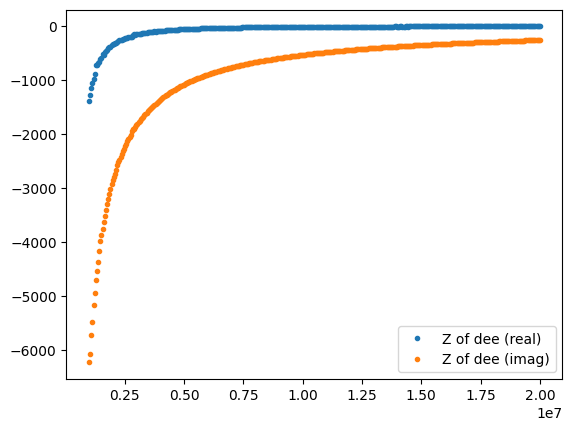

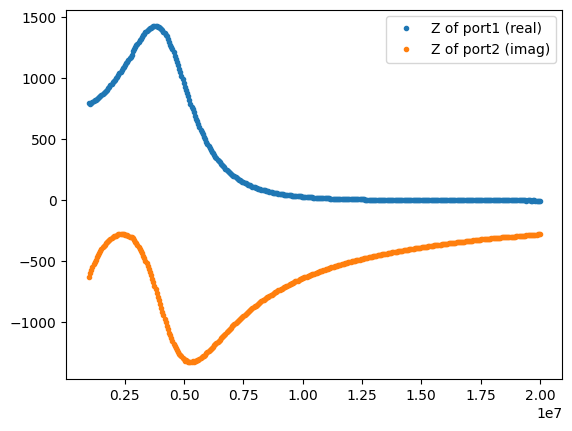

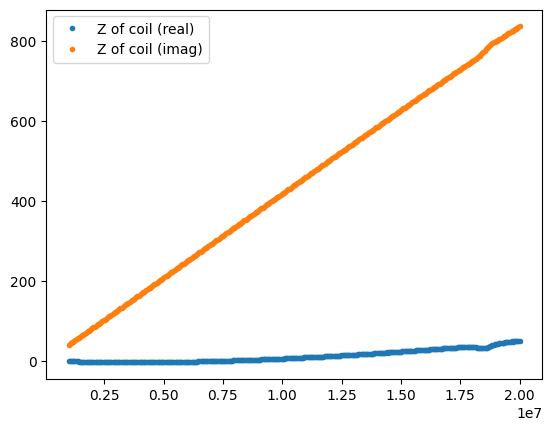

<Figure size 640x480 with 0 Axes>

In [229]:
data1 = np.loadtxt("../data/coil+dee(serial)_1_20_02_13_dee_to_port1(2).s2p",delimiter=' ')
data2 = np.loadtxt("../data/coil+dee(serial)_dee_to_port2_1-20MHz_2026_02_13.s2p",delimiter=' ')

#port1がなぞ？

freq, Z_dee, Z_stray_port1, Z_coil = stoz.two_bridges_with_stray_in_port1(data1, data2)

plt.plot(freq, Z_dee.real, '.', label = 'Z of dee (real)' )
plt.plot(freq, Z_dee.imag, '.', label = 'Z of dee (imag)')
plt.legend()
plt.figure()

plt.plot(freq, Z_stray_port1.real, '.', label = 'Z of port1 (real)' )
plt.plot(freq, Z_stray_port1.imag, '.', label = 'Z of port2 (imag)')
plt.legend()
plt.figure()

plt.plot(freq, Z_coil.real, '.', label = 'Z of coil (real)' )
plt.plot(freq, Z_coil.imag, '.', label = 'Z of coil (imag)')
plt.legend()
plt.figure()

fitしてみよう

2.639999225926146e-11 ± 7.058147625046989e-14
-80.3339594456537 ± 3.6450630705358407
ideal :  2.7537887084223298e-11 ± 7.679702000902672e-14


<Figure size 640x480 with 0 Axes>

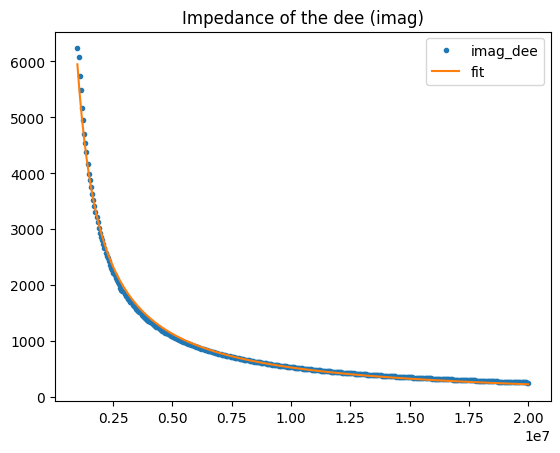

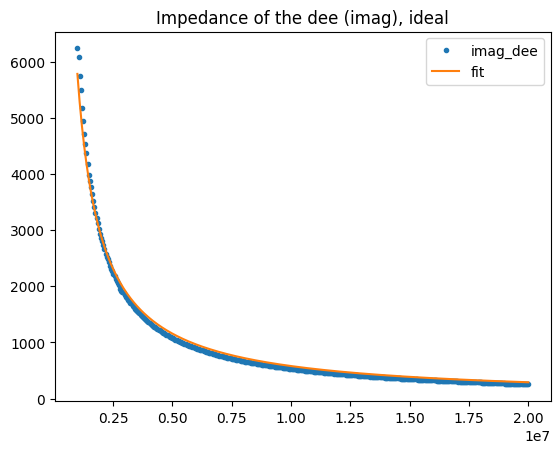

<Figure size 640x480 with 0 Axes>

In [230]:
# freq_min, freq_max = 0.4 * 10 ** 7, 2.00 * 10 ** 7
# mask = (freq >= freq_min) & (freq <= freq_max)
# freq_fit = freq[mask]
# z_fit = np.abs(Z_C)[mask]

popt,pcov = curve_fit(zmodel.inverse_prop,freq,-Z_dee.imag)
error = np.sqrt(np.diag(pcov))
print(1 / (2 * np.pi *popt[0]), '±', error[0]/ (2 * np.pi *popt[0]**2))
print(popt[1], '±', error[1])

plt.plot(freq,-Z_dee.imag,'.',label='imag_dee')
plt.plot(freq,zmodel.inverse_prop(freq,*popt), label = 'fit')
plt.legend()
plt.title('Impedance of the dee (imag)')
plt.figure()

popt,pcov = curve_fit(zmodel.inverse_prop_ideal,freq,-Z_dee.imag)
print('ideal : ',1 / (2 * np.pi *popt[0]), '±', error[0]/ (2 * np.pi *popt[0]**2))
C = 1 / (2 * np.pi *popt[0])


plt.plot(freq,-Z_dee.imag,'.',label='imag_dee')
plt.plot(freq,zmodel.inverse_prop_ideal(freq,*popt), label = 'fit')
plt.legend()
plt.title('Impedance of the dee (imag), ideal')
plt.figure()



6.681875295496849e-06 ± 2.000782402603175e-09
-2.0593426387324745 ± 0.14900228827293988


<Figure size 640x480 with 0 Axes>

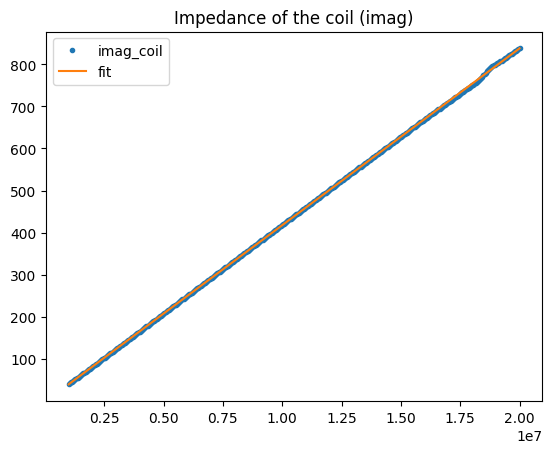

<Figure size 640x480 with 0 Axes>

In [231]:
popt,pcov = curve_fit(zmodel.linear,freq,Z_coil.imag)
error = np.sqrt(np.diag(pcov))
print(popt[0]/(2 * np.pi), '±', error[0]/ (2 * np.pi))
print(popt[1], '±', error[1])
L = popt[0]/(2 * np.pi)

plt.plot(freq,Z_coil.imag,'.',label='imag_coil')
plt.plot(freq,zmodel.linear(freq,*popt), label = 'fit')
plt.legend()
plt.title('Impedance of the coil (imag)')
plt.figure()

流石に直列だと思って良さそうなので、コイルとdeeのインピーダンスをたそうと思う

/Users/akadakotaro/Desktop/phys_lab_exp_2026/Q値とコイルのインダクタンスの測定/cyclotron/.venv/lib/python3.12/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/akadakotaro/Desktop/phys_lab_exp_2026/Q値とコイルのインダクタンスの測定/cyclotron/.venv/lib/python3.12/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/akadakotaro/Desktop/phys_lab_exp_2026/Q値とコイルのインダクタンスの測定/cyclotron/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:1664: ComplexWarning: Casting complex values to real discards the imaginary part
  return interp_func(x, xp, fp, left, right)


Q = 145.28635312236185
R = 3.390463341874684 ohm
ratio vol of dee to incident power :  378.3287512365968


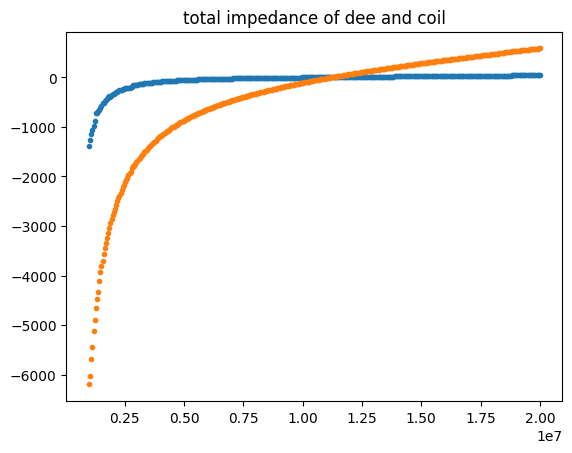

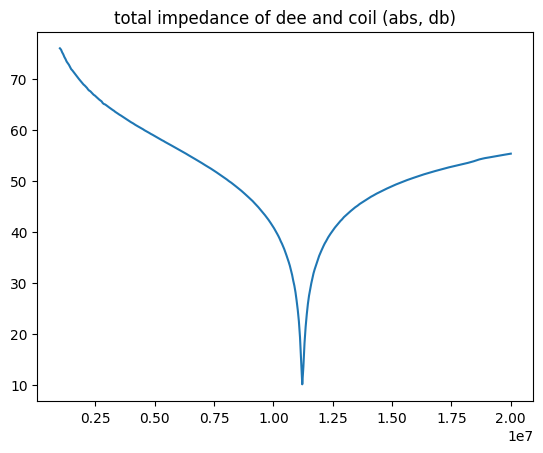

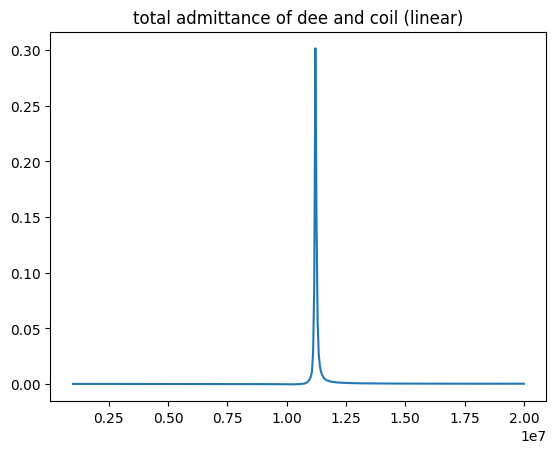

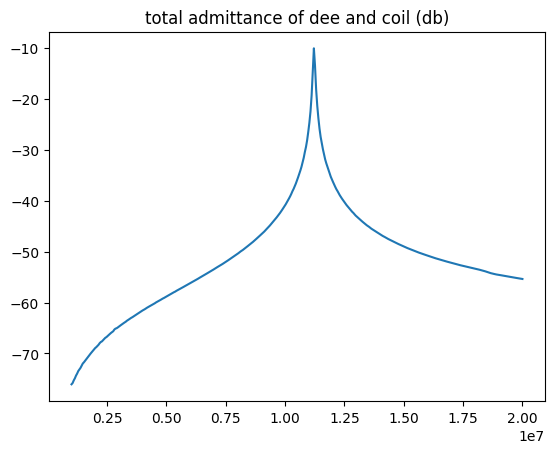

<Figure size 640x480 with 0 Axes>

In [233]:
Z_tot = Z_dee + Z_coil
plt.plot(freq, Z_tot.real, '.', label = 'real')
plt.plot(freq, Z_tot.imag, '.',label= 'iag')
plt.title('total impedance of dee and coil')
plt.figure()
#なぜか実インピーダンスが負になる。。

plt.plot(freq, stoz.db(Z_tot))
plt.title('total impedance of dee and coil (abs, db)')
plt.figure()

#まあ上のインピーダンスからQを求めて、共振周波数も求めてLも分かればRもわかるか

plt.plot(freq, 1/Z_tot)
plt.title('total admittance of dee and coil (linear)')
plt.figure()
plt.plot(freq, stoz.db(1/Z_tot))
plt.title('total admittance of dee and coil (db)')
plt.figure()
#admittanceはインピーダンスの逆数
Q = usf.q_value(freq, stoz.db(1/Z_tot))
R = np.sqrt(L/C)/Q
print('Q =',Q)
print('R =',R, 'ohm' )
#電力に対するピーク電圧
ratio_vol_to_sqrt_power = np.sqrt(2 * R) * Q
print('ratio vol of dee to incident power : ', ratio_vol_to_sqrt_power)
